#SQLAlchemy

In [1]:
pip install pandas sqlalchemy

#Identificando encoding dos arquivos

In [2]:
#tentei fazer o import dos arquivos mas recebi o erro de encoding, então inseri este script que me informa o encoding de cada um dos arquivos no meu repositório.
import os
from chardet import detect

folder_path = '/content/drive/MyDrive/USE'

csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

encodings = {}

def detect_encoding(file_path):
    with open(file_path, 'rb') as file:
        result = detect(file.read(10000))  # Lê os primeiros 10.000 bytes
        return result['encoding']

for file_name in csv_files:
    file_path = os.path.join(folder_path, file_name)
    encoding = detect_encoding(file_path)
    encodings[file_name] = encoding

for file_name, encoding in encodings.items():
    print(f"Arquivo: {file_name}, Encoding: {encoding}")


Arquivo: escolas122023.csv, Encoding: ISO-8859-1
Arquivo: escolas-dez-2011.csv, Encoding: ISO-8859-1
Arquivo: escolas122021.csv, Encoding: ISO-8859-1
Arquivo: escolas-dez-2010.csv, Encoding: ISO-8859-1
Arquivo: escolas122018.csv, Encoding: UTF-8-SIG
Arquivo: escolas122022.csv, Encoding: ISO-8859-1
Arquivo: escolas122019.csv, Encoding: UTF-8-SIG
Arquivo: escolasr34.csv, Encoding: UTF-8-SIG
Arquivo: idadeserieneeracadez21.csv, Encoding: ISO-8859-1
Arquivo: escolasr34dez2017.csv, Encoding: ISO-8859-1
Arquivo: escolas-dez-2012.csv, Encoding: ISO-8859-1
Arquivo: escolas-dez-2014.csv, Encoding: ISO-8859-1
Arquivo: escolas-dez-2013.csv, Encoding: ISO-8859-1
Arquivo: escolas-dez-2015.csv, Encoding: ISO-8859-1
Arquivo: idadeserieneeracadez17.csv, Encoding: ISO-8859-1
Arquivo: idadeserieneeracadez20.csv, Encoding: ISO-8859-1
Arquivo: idadeserieneeracadez23.csv, Encoding: ISO-8859-1
Arquivo: idadeserieneeracadez19.csv, Encoding: utf-8
Arquivo: idadeserieneeraca-r33.csv, Encoding: ISO-8859-1
Arqui

#Importando os arquivos para o sqlite

In [ ]:
#com o encoding em mãos, consigo fazer o import.
import sqlite3
import pandas as pd
from sqlalchemy import create_engine

db_conn = 'sqlite:///test_analytics.db'

engine = create_engine(db_conn)

arquivos = {
    "escolas-dez-2010.csv": "ISO-8859-1",
    "escolas-dez-2011.csv": "ISO-8859-1",
    "escolas-dez-2012.csv": "ISO-8859-1",
    "escolas-dez-2013.csv": "ISO-8859-1",
    "escolas-dez-2014.csv": "ISO-8859-1",
    "escolas-dez-2015.csv": "ISO-8859-1",
    "escolasr34.csv": "UTF-8-SIG",
    "escolasr34dez2017.csv": "ISO-8859-1",
    "escolas122018.csv": "UTF-8-SIG",
    "escolas122019.csv": "UTF-8-SIG",
    "escolas122020.csv": "utf-8",
    "escolas122021.csv": "ISO-8859-1",
    "escolas122022.csv": "ISO-8859-1",
    "escolas122023.csv": "ISO-8859-1",
    "idadeserieneeraca-r33.csv": "ISO-8859-1",
    "idadeserieneeracadez17.csv": "ISO-8859-1",
    "idadeserieneeracadez18.csv": "UTF-8-SIG",
    "idadeserieneeracadez19.csv": "utf-8",
    "idadeserieneeracadez20.csv": "ISO-8859-1",
    "idadeserieneeracadez21.csv": "ISO-8859-1",
    "idadeserieneeracadez22.csv": "ISO-8859-1",
    "idadeserieneeracadez23.csv": "ISO-8859-1"
}

base_path = "/content/drive/MyDrive/USE/"

for nome_arquivo, encoding in arquivos.items():

    caminho_completo = base_path + nome_arquivo

    df = pd.read_csv(caminho_completo, encoding=encoding, sep=';')

    df.to_sql(nome_arquivo.split('.')[0], engine, if_exists='replace', index=False)

print("Dados importados com sucesso.")


#Verificando se os arquivos subiram como tabelas no sqlite

In [4]:
db_path = 'test_analytics.db'

conn = sqlite3.connect(db_path)
query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = conn.execute(query).fetchall()
for table in tables:
    print(table[0])
conn.commit()

escolas_alunos2
sqlite_sequence
escolas-dez-2010
escolas-dez-2011
escolas-dez-2012
escolas-dez-2013
escolas-dez-2014
escolas-dez-2015
escolasr34
escolasr34dez2017
escolas122018
escolas122019
escolas122020
escolas122021
escolas122022
escolas122023
idadeserieneeraca-r33
idadeserieneeracadez17
idadeserieneeracadez18
idadeserieneeracadez19
idadeserieneeracadez20
idadeserieneeracadez21
idadeserieneeracadez22
idadeserieneeracadez23


In [5]:
#Utilizei essa linha de comando pq identifiquei que os dados desse arquivo estavam com o ano "2019".
cur = conn.cursor()
cur.execute("UPDATE idadeserieneeracadez18 SET ano = 2018 WHERE ano = 2019")
conn.commit()

#Verificando os dados

In [96]:
query = 'SELECT * FROM "idadeserieneeracadez18" LIMIT 10;'
data = conn.execute(query).fetchall()
for row in data:
    print(row)
conn.commit()

(' BT', 191, 'EMEF        ', 'ALIPIO CORREA NETO, PROF', 'VILA SONIA', 9404, 2018, 'DIR', 'ENSINO FUNDAMENTAL DE 9 ANOS', 'CI 1ANO FND 9A      ', 'DIURNO', 3, 'Tarde               ', 'F', 5, 'NAO POSSUI', 'NAO INFORMADA', 1, '30/12/2018')
(' BT', 191, 'EMEF        ', 'ALIPIO CORREA NETO, PROF', 'VILA SONIA', 9404, 2018, 'DIR', 'ENSINO FUNDAMENTAL DE 9 ANOS', 'CI 1ANO FND 9A      ', 'DIURNO', 3, 'Tarde               ', 'F', 5, 'NAO POSSUI', 'PARDA', 1, '30/12/2018')
(' BT', 191, 'EMEF        ', 'ALIPIO CORREA NETO, PROF', 'VILA SONIA', 9404, 2018, 'DIR', 'ENSINO FUNDAMENTAL DE 9 ANOS', 'CI 1ANO FND 9A      ', 'DIURNO', 3, 'Tarde               ', 'F', 6, 'DEFIC. FISICA NAO CADEIRANTE', 'NAO INFORMADA', 1, '30/12/2018')
(' BT', 191, 'EMEF        ', 'ALIPIO CORREA NETO, PROF', 'VILA SONIA', 9404, 2018, 'DIR', 'ENSINO FUNDAMENTAL DE 9 ANOS', 'CI 1ANO FND 9A      ', 'DIURNO', 3, 'Tarde               ', 'F', 6, 'NAO POSSUI', 'BRANCA', 9, '30/12/2018')
(' BT', 191, 'EMEF        ', 'ALIPIO CORR

#Criando a tabela "escolas_alunos2" no sqlite

In [7]:
cur.execute('''
CREATE TABLE escolas_alunos (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    codesc TEXT,
    nome_escola TEXT,
    ano_escola DATE,
    situacao TEXT,
    diretoria TEXT,
    distrito TEXT,
    dscserie TEXT,
    descturno TEXT,
    ano_aluno INTEGER,
    sexo TEXT,
    idade INTEGER,
    nee TEXT,
    raca TEXT,
    qtde INTEGER
)
''')
conn.commit()

#Insert Into 2016

In [8]:
df=pd.read_csv("/content/drive/MyDrive/USE/escolasr34.csv", encoding='utf-8', sep=';')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5131 entries, 0 to 5130
Data columns (total 51 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DRE          5131 non-null   object 
 1   CODESC       5131 non-null   int64  
 2   TIPOESC      5131 non-null   object 
 3   NOMESC       5131 non-null   object 
 4   DIRETORIA    5131 non-null   object 
 5   SUBPREF      5131 non-null   object 
 6   CEU          232 non-null    object 
 7   ENDERECO     5131 non-null   object 
 8   NUMERO       5131 non-null   object 
 9   BAIRRO       5131 non-null   object 
 10  CEP          5131 non-null   int64  
 11  TEL1         4025 non-null   object 
 12  TEL2         1116 non-null   object 
 13  FAX          892 non-null    object 
 14  SITUACAO     5131 non-null   object 
 15  CODDIST      5074 non-null   float64
 16  DISTRITO     5131 non-null   object 
 17  SETOR        5074 non-null   float64
 18  CODINEP      4634 non-null   float64
 19  CODCIE

In [9]:
df=pd.read_csv("/content/drive/MyDrive/USE/idadeserieneeraca-r33.csv", encoding='ISO-8859-1', sep=';')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374610 entries, 0 to 374609
Data columns (total 21 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   DRE        374610 non-null  object
 1   CODESC     374610 non-null  int64 
 2   TIPOESC    374610 non-null  object
 3   NOMESC     374610 non-null  object
 4   DISTRITO   374610 non-null  object
 5   SETEDU     374610 non-null  int64 
 6   ANO        374610 non-null  int64 
 7   REDE       374610 non-null  object
 8   MODAL      374610 non-null  object
 9   MODALID    374610 non-null  object
 10  SERIEV     374610 non-null  object
 11  DESCSERIE  374610 non-null  object
 12  PERIODO    374610 non-null  object
 13  TURNO      374610 non-null  int64 
 14  DESCTURNO  374610 non-null  object
 15  SEXO       374610 non-null  object
 16  IDADE      374610 non-null  int64 
 17  NEE        374610 non-null  object
 18  RACA       371538 non-null  object
 19  QTDE       374610 non-null  int64 
 20  DATA

In [10]:
cur.execute('''
INSERT INTO escolas_alunos (codesc, nome_escola, ano_escola, situacao, diretoria, distrito, dscserie, descturno, ano_aluno, sexo, idade, nee, raca, qtde)
SELECT
    escolasr34.CODESC,
    escolasr34.NOMESC as nome_escola,
    escolasr34.DATABASE as ano_escola,
    escolasr34.SITUACAO,
    escolasr34.DIRETORIA,
    escolasr34.DISTRITO,
    alunoAno2016.DESCSERIE,
    alunoAno2016.DESCTURNO,
    alunoAno2016.ANO as ano_aluno,
    alunoAno2016.SEXO,
    alunoAno2016.IDADE,
    alunoAno2016.NEE,
    alunoAno2016.RACA,
    alunoAno2016.QTDE
FROM
    escolasr34
JOIN
    "idadeserieneeraca-r33" as alunoAno2016 ON escolasr34.CODESC = alunoAno2016.CODESC
''')
conn.commit()


#Insert Into 2017

In [11]:
df=pd.read_csv("/content/drive/MyDrive/USE/idadeserieneeracadez17.csv", encoding='ISO-8859-1', sep=';')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346861 entries, 0 to 346860
Data columns (total 21 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   DRE        346861 non-null  object
 1   CODESC     346861 non-null  int64 
 2   TIPOESC    346861 non-null  object
 3   NOMESC     346861 non-null  object
 4   DISTRITO   346861 non-null  object
 5   SETEDU     346861 non-null  int64 
 6   ANO        346861 non-null  int64 
 7   REDE       346861 non-null  object
 8   MODAL      346861 non-null  object
 9   MODALID    346861 non-null  object
 10  SERIEV     346861 non-null  object
 11  DESCSERIE  346861 non-null  object
 12  PERIODO    346861 non-null  object
 13  TURNO      346861 non-null  int64 
 14  DESCTURNO  346861 non-null  object
 15  SEXO       346861 non-null  object
 16  IDADE      346861 non-null  int64 
 17  NEE        346861 non-null  object
 18  RACA       343667 non-null  object
 19  QTDE       346861 non-null  int64 
 20  DATA

In [12]:
df=pd.read_csv("/content/drive/MyDrive/USE/escolasr34dez2017.csv", encoding='ISO-8859-1', sep=';')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6878 entries, 0 to 6877
Data columns (total 53 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DRE          5628 non-null   object 
 1   CODESC       6878 non-null   int64  
 2   TIPOESC      6878 non-null   object 
 3   NOMESC       6878 non-null   object 
 4   DIRETORIA    5628 non-null   object 
 5   SUBPREF      5673 non-null   object 
 6   CEU          232 non-null    object 
 7   ENDERECO     6878 non-null   object 
 8   NUMERO       6878 non-null   object 
 9   BAIRRO       6878 non-null   object 
 10  CEP          6878 non-null   int64  
 11  TEL1         4552 non-null   object 
 12  TEL2         1174 non-null   object 
 13  FAX          812 non-null    object 
 14  SITUACAO     6878 non-null   object 
 15  CODDIST      5613 non-null   float64
 16  DISTRITO     5673 non-null   object 
 17  SETOR        5613 non-null   float64
 18  CODINEP      4685 non-null   float64
 19  CODCIE

In [13]:
cur.execute('''
INSERT INTO escolas_alunos (codesc, nome_escola, ano_escola, situacao, diretoria, distrito, dscserie, descturno, ano_aluno, sexo, idade, nee, raca, qtde)
SELECT
    escolasr34dez2017.CODESC,
    escolasr34dez2017.NOMESC as nome_escola,
    escolasr34dez2017.DATABASE as ano_escola,
    escolasr34dez2017.SITUACAO,
    escolasr34dez2017.DIRETORIA,
    escolasr34dez2017.DISTRITO,
    alunoAno2017.DESCSERIE,
    alunoAno2017.DESCTURNO,
    alunoAno2017.ANO as ano_aluno,
    alunoAno2017.SEXO,
    alunoAno2017.IDADE,
    alunoAno2017.NEE,
    alunoAno2017.RACA,
    alunoAno2017.QTDE
FROM
    escolasr34dez2017
JOIN
    "idadeserieneeracadez17" as alunoAno2017 ON escolasr34dez2017.CODESC = alunoAno2017.CODESC
''')
conn.commit()


#Insert Into 2018

In [14]:
df=pd.read_csv("/content/drive/MyDrive/USE/escolas122018.csv", encoding='ISO-8859-1', sep=';')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4753 entries, 0 to 4752
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ï»¿dre       4753 non-null   object 
 1   codesc       4753 non-null   int64  
 2   tipoesc      4753 non-null   object 
 3   nomesc       4753 non-null   object 
 4   ceu          47 non-null     object 
 5   diretoria    4753 non-null   object 
 6   subpref      4753 non-null   object 
 7   endereco     4753 non-null   object 
 8   numero       4753 non-null   object 
 9   bairro       4753 non-null   object 
 10  cep          4753 non-null   int64  
 11  tel1         3679 non-null   float64
 12  tel2         1065 non-null   object 
 13  fax          116 non-null    float64
 14  situacao     4753 non-null   object 
 15  coddist      4753 non-null   int64  
 16  distrito     4752 non-null   object 
 17  setor        4753 non-null   int64  
 18  codinep      4403 non-null   float64
 19  cd_cie

In [15]:
df=pd.read_csv("/content/drive/MyDrive/USE/idadeserieneeracadez18.csv", encoding='ISO-8859-1', sep=';')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284875 entries, 0 to 284874
Data columns (total 19 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   ï»¿dre     284875 non-null  object
 1   codes      284875 non-null  int64 
 2   tipoesc    284875 non-null  object
 3   nomesc     284875 non-null  object
 4   distrito   284875 non-null  object
 5   setor      284875 non-null  int64 
 6   ano        284875 non-null  int64 
 7   rede       283847 non-null  object
 8   modal      284875 non-null  object
 9   descserie  284875 non-null  object
 10  periodo    284875 non-null  object
 11  turno      284875 non-null  int64 
 12  descturno  284875 non-null  object
 13  sexo       284875 non-null  object
 14  idade      284875 non-null  int64 
 15  nee        284875 non-null  object
 16  raca       282386 non-null  object
 17  qtd        284875 non-null  int64 
 18  database   284875 non-null  object
dtypes: int64(6), object(13)
memory usage: 41.3+ 

In [16]:
cur.execute('''
INSERT INTO escolas_alunos (codesc, nome_escola, ano_escola, situacao, diretoria, distrito, dscserie, descturno, ano_aluno, sexo, idade, nee, raca, qtde)
SELECT
    escolas122018.codesc,
    escolas122018.nomesc as nome_escola,
    escolas122018.database as ano_escola,
    escolas122018.situacao,
    escolas122018.diretoria,
    escolas122018.distrito,
    alunoAno2018.descserie,
    alunoAno2018.descturno,
    alunoAno2018.ano as ano_aluno,
    alunoAno2018.sexo,
    alunoAno2018.idade,
    alunoAno2018.nee,
    alunoAno2018.raca,
    alunoAno2018.qtd
FROM
    escolas122018
JOIN
    "idadeserieneeracadez18" as alunoAno2018 ON escolas122018.codesc = alunoAno2018.codes
''')
conn.commit()


#Insert Into 2019

In [17]:
df=pd.read_csv("/content/drive/MyDrive/USE/escolas122019.csv", encoding='utf-8', sep=';')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4910 entries, 0 to 4909
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dre          4910 non-null   object 
 1   codesc       4910 non-null   int64  
 2   tipoesc      4910 non-null   object 
 3   nomesc       4910 non-null   object 
 4   ceu          47 non-null     object 
 5   diretoria    4910 non-null   object 
 6   subpref      4910 non-null   object 
 7   endereco     4910 non-null   object 
 8   numero       4910 non-null   object 
 9   bairro       4910 non-null   object 
 10  cep          4910 non-null   int64  
 11  tel1         3739 non-null   float64
 12  tel2         1070 non-null   object 
 13  fax          114 non-null    float64
 14  situacao     4910 non-null   object 
 15  coddist      4910 non-null   int64  
 16  distrito     4910 non-null   object 
 17  setor        4910 non-null   int64  
 18  codinep      4541 non-null   float64
 19  cd_cie

In [18]:
df=pd.read_csv("/content/drive/MyDrive/USE/idadeserieneeracadez19.csv", encoding='utf-8', sep=';')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534975 entries, 0 to 534974
Data columns (total 19 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   dre        534975 non-null  object 
 1   codes      534975 non-null  int64  
 2   tipoesc    534975 non-null  object 
 3   nomesc     534975 non-null  object 
 4   distrito   534975 non-null  object 
 5   setor      534975 non-null  int64  
 6   ano        534975 non-null  int64  
 7   rede       526530 non-null  object 
 8   modal      534975 non-null  object 
 9   descserie  534975 non-null  object 
 10  periodo    534975 non-null  object 
 11  turno      534975 non-null  int64  
 12  descturno  534975 non-null  object 
 13  sexo       534975 non-null  object 
 14  idade      534975 non-null  float64
 15  nee        534975 non-null  object 
 16  raca       534901 non-null  object 
 17  qtd        534975 non-null  int64  
 18  database   534975 non-null  object 
dtypes: float64(1), int64(5)

In [19]:
cur.execute('''
INSERT INTO escolas_alunos (codesc, nome_escola, ano_escola, situacao, diretoria, distrito, dscserie, descturno, ano_aluno, sexo, idade, nee, raca, qtde)
SELECT
    escolas122019.codesc,
    escolas122019.nomesc as nome_escola,
    escolas122019.database as ano_escola,
    escolas122019.situacao,
    escolas122019.diretoria,
    escolas122019.distrito,
    alunoAno2019.descserie,
    alunoAno2019.descturno,
    alunoAno2019.ano as ano_aluno,
    alunoAno2019.sexo,
    alunoAno2019.idade,
    alunoAno2019.nee,
    alunoAno2019.raca,
    alunoAno2019.qtd
FROM
    escolas122019
JOIN
    "idadeserieneeracadez19" as alunoAno2019 ON escolas122019.codesc = alunoAno2019.codes
''')
conn.commit()


#Insert Into 2020

In [20]:
df=pd.read_csv("/content/drive/MyDrive/USE/escolas122020.csv", encoding='utf-8', sep=';')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4753 entries, 0 to 4752
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dre          4753 non-null   object 
 1   codesc       4753 non-null   int64  
 2   tipoesc      4753 non-null   object 
 3   nomesc       4753 non-null   object 
 4   ceu          47 non-null     object 
 5   diretoria    4753 non-null   object 
 6   subpref      4753 non-null   object 
 7   endereco     4753 non-null   object 
 8   numero       4753 non-null   object 
 9   bairro       4753 non-null   object 
 10  cep          4753 non-null   int64  
 11  tel1         3679 non-null   float64
 12  tel2         1065 non-null   float64
 13  fax          116 non-null    float64
 14  situacao     4753 non-null   object 
 15  coddist      4753 non-null   int64  
 16  distrito     4752 non-null   object 
 17  setor        4753 non-null   int64  
 18  codinep      4403 non-null   float64
 19  cd_cie

In [21]:
df=pd.read_csv("/content/drive/MyDrive/USE/idadeserieneeracadez20.csv", encoding='ISO-8859-1', sep=';')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357201 entries, 0 to 357200
Data columns (total 19 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   DRE        357201 non-null  object 
 1   CODESC     357201 non-null  int64  
 2   TIPOESC    357201 non-null  object 
 3   NOMESC     357201 non-null  object 
 4   DISTRITO   357201 non-null  object 
 5   SETOR      357201 non-null  int64  
 6   ANO        357201 non-null  int64  
 7   REDE       357201 non-null  object 
 8   MODAL      357201 non-null  object 
 9   DESCSERIE  357201 non-null  object 
 10  PERIODO    357201 non-null  object 
 11  TURNO      357201 non-null  int64  
 12  DESCTURNO  357201 non-null  object 
 13  SEXO       356719 non-null  object 
 14  IDADE      356719 non-null  float64
 15  NEE        357201 non-null  object 
 16  RACA       357201 non-null  object 
 17  Qtde       357201 non-null  int64  
 18  DATABASE   357201 non-null  object 
dtypes: float64(1), int64(5)

In [22]:
cur.execute('''
INSERT INTO escolas_alunos (codesc, nome_escola, ano_escola, situacao, diretoria, distrito, dscserie, descturno, ano_aluno, sexo, idade, nee, raca, qtde)
SELECT
    escolas122020.codesc,
    escolas122020.nomesc as nome_escola,
    escolas122020.database as ano_escola,
    escolas122020.situacao,
    escolas122020.diretoria,
    escolas122020.distrito,
    alunoAno2020.DESCSERIE,
    alunoAno2020.DESCTURNO,
    alunoAno2020.ANO as ano_aluno,
    alunoAno2020.SEXO,
    alunoAno2020.IDADE,
    alunoAno2020.NEE,
    alunoAno2020.RACA,
    alunoAno2020.Qtde
FROM
    escolas122020
JOIN
    "idadeserieneeracadez20" as alunoAno2020 ON escolas122020.codesc = alunoAno2020.CODESC
''')
conn.commit()


#Insert Into 2021

In [23]:
df=pd.read_csv("/content/drive/MyDrive/USE/escolas122021.csv", encoding='ISO-8859-1', sep=';')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DRE          4801 non-null   object 
 1   CODESC       4801 non-null   int64  
 2   TIPOESC      4801 non-null   object 
 3   NOMES        4801 non-null   object 
 4   NOMESCOFI    4801 non-null   object 
 5   CEU          152 non-null    object 
 6   DIRETORIA    4801 non-null   object 
 7   SUBPREF      4801 non-null   object 
 8   ENDERECO     4801 non-null   object 
 9   NUMERO       4801 non-null   object 
 10  BAIRRO       4801 non-null   object 
 11  CEP          4801 non-null   int64  
 12  TEL1         4593 non-null   object 
 13  TEL2         1315 non-null   object 
 14  FAX          494 non-null    object 
 15  SITUACAO     4801 non-null   object 
 16  CODDIST      4801 non-null   int64  
 17  DISTRITO     4801 non-null   object 
 18  SETOR        4801 non-null   int64  
 19  CODINE

In [24]:
df=pd.read_csv("/content/drive/MyDrive/USE/idadeserieneeracadez21.csv", encoding='ISO-8859-1', sep=';')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293817 entries, 0 to 293816
Data columns (total 19 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   DRE        293817 non-null  object 
 1   CODESC     293817 non-null  int64  
 2   TIPOESC    293817 non-null  object 
 3   NOMESC     293817 non-null  object 
 4   DISTRITO   293817 non-null  object 
 5   SETOR      293817 non-null  int64  
 6   ANO        293817 non-null  int64  
 7   REDE       293817 non-null  object 
 8   MODAL      271393 non-null  object 
 9   DESCSERIE  293811 non-null  object 
 10  PERIODO    293817 non-null  object 
 11  TURNO      293817 non-null  int64  
 12  DESCTURNO  293817 non-null  object 
 13  SEXO       293778 non-null  object 
 14  IDADE      293796 non-null  float64
 15  NEE        293817 non-null  object 
 16  RACA       293080 non-null  object 
 17  Qtde       293817 non-null  int64  
 18  DATABASE   293817 non-null  object 
dtypes: float64(1), int64(5)

In [25]:
cur.execute('''
INSERT INTO escolas_alunos (codesc, nome_escola, ano_escola, situacao, diretoria, distrito, dscserie, descturno, ano_aluno, sexo, idade, nee, raca, qtde)
SELECT
    escolas122021.CODESC,
    escolas122021.NOMES as nome_escola,
    escolas122021.DATABASE as ano_escola,
    escolas122021.SITUACAO,
    escolas122021.DIRETORIA,
    escolas122021.DISTRITO,
    alunoAno2021.DESCSERIE,
    alunoAno2021.DESCTURNO,
    alunoAno2021.ANO as ano_aluno,
    alunoAno2021.SEXO,
    alunoAno2021.IDADE,
    alunoAno2021.NEE,
    alunoAno2021.RACA,
    alunoAno2021.Qtde
FROM
    escolas122021
JOIN
    "idadeserieneeracadez21" as alunoAno2021 ON escolas122021.CODESC = alunoAno2021.CODESC
''')
conn.commit()


#Insert Into 2022

In [26]:
df=pd.read_csv("/content/drive/MyDrive/USE/escolas122022.csv", encoding='ISO-8859-1', sep=';')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4937 entries, 0 to 4936
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DRE          4937 non-null   object 
 1   CODESC       4937 non-null   int64  
 2   TIPOESC      4937 non-null   object 
 3   NOMES        4937 non-null   object 
 4   NOMESCOFI    4937 non-null   object 
 5   CEU          153 non-null    object 
 6   DIRETORIA    4937 non-null   object 
 7   SUBPREF      4937 non-null   object 
 8   ENDERECO     4937 non-null   object 
 9   NUMERO       4937 non-null   object 
 10  BAIRRO       4937 non-null   object 
 11  CEP          4937 non-null   int64  
 12  TEL1         4701 non-null   object 
 13  TEL2         1324 non-null   object 
 14  FAX          470 non-null    object 
 15  SITUACAO     4937 non-null   object 
 16  CODDIST      4937 non-null   int64  
 17  DISTRITO     4937 non-null   object 
 18  SETOR        4937 non-null   int64  
 19  CODINE

In [27]:
df=pd.read_csv("/content/drive/MyDrive/USE/idadeserieneeracadez22.csv", encoding='ISO-8859-1', sep=';')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621490 entries, 0 to 621489
Data columns (total 19 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   DRE        621490 non-null  object
 1   CODESC     621490 non-null  int64 
 2   TIPOESC    621490 non-null  object
 3   NOMESC     621490 non-null  object
 4   DISTRITO   621490 non-null  object
 5   SETOR      621490 non-null  int64 
 6   ANO        621490 non-null  int64 
 7   REDE       621490 non-null  object
 8   MODAL      621490 non-null  object
 9   DESCSERIE  621490 non-null  object
 10  PERIODO    621490 non-null  object
 11  TURNO      621490 non-null  int64 
 12  DESCTURNO  621490 non-null  object
 13  SEXO       621490 non-null  object
 14  IDADE      621490 non-null  int64 
 15  NEE        621490 non-null  object
 16  RACA       621490 non-null  object
 17  Qtde       621490 non-null  int64 
 18  DATABASE   621490 non-null  object
dtypes: int64(6), object(13)
memory usage: 90.1+ 

In [28]:
cur.execute('''
INSERT INTO escolas_alunos (codesc, nome_escola, ano_escola, situacao, diretoria, distrito, dscserie, descturno, ano_aluno, sexo, idade, nee, raca, qtde)
SELECT
    escolas122022.CODESC,
    escolas122022.NOMES as nome_escola,
    escolas122022.DATABASE as ano_escola,
    escolas122022.SITUACAO,
    escolas122022.DIRETORIA,
    escolas122022.DISTRITO,
    alunoAno2022.DESCSERIE,
    alunoAno2022.DESCTURNO,
    alunoAno2022.ANO as ano_aluno,
    alunoAno2022.SEXO,
    alunoAno2022.IDADE,
    alunoAno2022.NEE,
    alunoAno2022.RACA,
    alunoAno2022.Qtde
FROM
    escolas122022
JOIN
    "idadeserieneeracadez22" as alunoAno2022 ON escolas122022.CODESC = alunoAno2022.CODESC
''')
conn.commit()


#Insert Into 2023

In [29]:
df=pd.read_csv("/content/drive/MyDrive/USE/escolas122023.csv", encoding='ISO-8859-1', sep=';')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4931 entries, 0 to 4930
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DRE          4931 non-null   object 
 1   CODESC       4931 non-null   int64  
 2   TIPOESC      4931 non-null   object 
 3   NOMES        4931 non-null   object 
 4   DESLOC       4931 non-null   object 
 5   CEU          257 non-null    object 
 6   DIRETORIA    4931 non-null   object 
 7   SUBPREF      4931 non-null   object 
 8   ENDERECO     4931 non-null   object 
 9   NUMERO       4931 non-null   object 
 10  BAIRRO       4931 non-null   object 
 11  CEP          4931 non-null   int64  
 12  TEL1         4696 non-null   object 
 13  TEL2         1345 non-null   object 
 14  FAX          456 non-null    object 
 15  SITUACAO     4931 non-null   object 
 16  DISTRITO     4931 non-null   object 
 17  CDIST        4931 non-null   int64  
 18  SETOR        4931 non-null   int64  
 19  CODINE

In [30]:
df=pd.read_csv("/content/drive/MyDrive/USE/idadeserieneeracadez23.csv", encoding='ISO-8859-1', sep=';')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169100 entries, 0 to 169099
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   DRE        169100 non-null  object
 1   CODESC     169100 non-null  int64 
 2   TIPOESC    169100 non-null  object
 3   NOMESC     169100 non-null  object
 4   DISTRITO   169100 non-null  object
 5   SETOR      169100 non-null  int64 
 6   ANO        169100 non-null  int64 
 7   REDE       169100 non-null  object
 8   MODAL      169100 non-null  object
 9   DESCSERIE  169100 non-null  object
 10  PERIODO    169100 non-null  object
 11  TURNO      169100 non-null  int64 
 12  DESCTURNO  169100 non-null  object
 13  SEXO       169100 non-null  object
 14  IDADE      169100 non-null  int64 
 15  NEE        169100 non-null  object
 16  Qtde       169100 non-null  int64 
 17  DATABASE   169100 non-null  object
dtypes: int64(6), object(12)
memory usage: 23.2+ MB


In [31]:
cur.execute('''
INSERT INTO escolas_alunos (codesc, nome_escola, ano_escola, situacao, diretoria, distrito, dscserie, descturno, ano_aluno, sexo, idade, nee, qtde)
SELECT
    escolas122023.CODESC,
    escolas122023.NOMES as nome_escola,
    escolas122023.DATABASE as ano_escola,
    escolas122023.SITUACAO,
    escolas122023.DIRETORIA,
    escolas122023.DISTRITO,
    alunoAno2023.DESCSERIE,
    alunoAno2023.DESCTURNO,
    alunoAno2023.ANO as ano_aluno,
    alunoAno2023.SEXO,
    alunoAno2023.IDADE,
    alunoAno2023.NEE,

    alunoAno2023.Qtde
FROM
    escolas122023
JOIN
    "idadeserieneeracadez23" as alunoAno2023 ON escolas122023.CODESC = alunoAno2023.CODESC
''')
conn.commit()

#raça faltante

In [32]:
query = query = 'SELECT * FROM "escolas_alunos" LIMIT 10;'
data = conn.execute(query).fetchall()
for row in data:
    print(row)
    conn.commit()

(1, '400003', 'ALOYSIO DE MENEZES GREENHALGH, VER.', '30/09/2016', 'Ativa', 'BUTANTA', 'RIO PEQUENO', 'BERCARIO II-10h', 'Integral', 2016, 'F', 1, 'NAO POSSUI', 'BRANCA', 4)
(2, '400003', 'ALOYSIO DE MENEZES GREENHALGH, VER.', '30/09/2016', 'Ativa', 'BUTANTA', 'RIO PEQUENO', 'BERCARIO II-10h', 'Integral', 2016, 'F', 1, 'NAO POSSUI', 'PRETA', 1)
(3, '400003', 'ALOYSIO DE MENEZES GREENHALGH, VER.', '30/09/2016', 'Ativa', 'BUTANTA', 'RIO PEQUENO', 'BERCARIO II-10h', 'Integral', 2016, 'F', 2, 'NAO POSSUI', 'BRANCA', 2)
(4, '400003', 'ALOYSIO DE MENEZES GREENHALGH, VER.', '30/09/2016', 'Ativa', 'BUTANTA', 'RIO PEQUENO', 'BERCARIO II-10h', 'Integral', 2016, 'F', 2, 'NAO POSSUI', 'NÃO DECLARADA', 1)
(5, '400003', 'ALOYSIO DE MENEZES GREENHALGH, VER.', '30/09/2016', 'Ativa', 'BUTANTA', 'RIO PEQUENO', 'BERCARIO II-10h', 'Integral', 2016, 'F', 2, 'NAO POSSUI', 'PARDA', 1)
(6, '400003', 'ALOYSIO DE MENEZES GREENHALGH, VER.', '30/09/2016', 'Ativa', 'BUTANTA', 'RIO PEQUENO', 'BERCARIO II-10h', 'Int

In [33]:
escolas_alunos_df = pd.read_sql_query("SELECT * FROM escolas_alunos", conn)

escolas_alunos_df.head()

,id,codesc,nome_escola,ano_escola,situacao,diretoria,distrito,dscserie,descturno,ano_aluno,sexo,idade,nee,raca,qtde
0,1,400003,"ALOYSIO DE MENEZES GREENHALGH, VER.",30/09/2016,Ativa,BUTANTA,RIO PEQUENO,BERCARIO II-10h,Integral,2016,F,1.0,NAO POSSUI,BRANCA,4
1,2,400003,"ALOYSIO DE MENEZES GREENHALGH, VER.",30/09/2016,Ativa,BUTANTA,RIO PEQUENO,BERCARIO II-10h,Integral,2016,F,1.0,NAO POSSUI,PRETA,1
2,3,400003,"ALOYSIO DE MENEZES GREENHALGH, VER.",30/09/2016,Ativa,BUTANTA,RIO PEQUENO,BERCARIO II-10h,Integral,2016,F,2.0,NAO POSSUI,BRANCA,2
3,4,400003,"ALOYSIO DE MENEZES GREENHALGH, VER.",30/09/2016,Ativa,BUTANTA,RIO PEQUENO,BERCARIO II-10h,Integral,2016,F,2.0,NAO POSSUI,NÃO DECLARADA,1
4,5,400003,"ALOYSIO DE MENEZES GREENHALGH, VER.",30/09/2016,Ativa,BUTANTA,RIO PEQUENO,BERCARIO II-10h,Integral,2016,F,2.0,NAO POSSUI,PARDA,1


#tratamento de nulos e inserção de média
sem uma premissa de negócio, optei por realizar 2 tratamentos de nulos (dropna e fillna)

In [34]:
escolas_alunos_df.isnull().sum()

id                  0
codesc              0
nome_escola         0
ano_escola          0
situacao            0
diretoria           0
distrito            0
dscserie            6
descturno           0
ano_aluno           0
sexo              208
idade             190
nee                 0
raca           163048
qtde                0
dtype: int64

In [35]:
escolas_alunos_df.dropna(subset=['raca'], inplace=True)
escolas_alunos_df.isnull().sum()

id               0
codesc           0
nome_escola      0
ano_escola       0
situacao         0
diretoria        0
distrito         0
dscserie         5
descturno        0
ano_aluno        0
sexo           175
idade          175
nee              0
raca             0
qtde             0
dtype: int64

In [36]:
media_idade = escolas_alunos_df["idade"].mean()
media_idade


12.014921933756046

In [37]:
media_idade_arredondada = round(media_idade)
media_idade_arredondada

12

In [38]:
escolas_alunos_df.idade.fillna(media_idade_arredondada, inplace=True)

In [39]:
escolas_alunos_df.isnull().sum()

id               0
codesc           0
nome_escola      0
ano_escola       0
situacao         0
diretoria        0
distrito         0
dscserie         5
descturno        0
ano_aluno        0
sexo           175
idade            0
nee              0
raca             0
qtde             0
dtype: int64

In [40]:
escolas_alunos_df.dropna(subset=['dscserie'], inplace=True)

In [41]:
escolas_alunos_df.isnull().sum()

id               0
codesc           0
nome_escola      0
ano_escola       0
situacao         0
diretoria        0
distrito         0
dscserie         0
descturno        0
ano_aluno        0
sexo           175
idade            0
nee              0
raca             0
qtde             0
dtype: int64

In [42]:
escolas_alunos_df.dropna(subset=['sexo'], inplace=True)

In [43]:
escolas_alunos_df.isnull().sum()

id             0
codesc         0
nome_escola    0
ano_escola     0
situacao       0
diretoria      0
distrito       0
dscserie       0
descturno      0
ano_aluno      0
sexo           0
idade          0
nee            0
raca           0
qtde           0
dtype: int64

In [44]:
escolas_alunos_df.duplicated().sum()

0

In [45]:
escolas_alunos_df.describe()
#Aqui eu percebi um desvio na coluna "IDADE", com um valor máximo de 121 anos. Não consegui atuar para realizar uma análise dessa coluna, por exemplo, investigação de outliers etc.

,id,ano_aluno,idade,qtde
count,2.616747e+06,2.616747e+06,2.616747e+06,2.616747e+06
mean,1.315789e+06,2.019192e+03,1.201489e+01,3.278906e+00
std,7.578776e+05,2.096694e+00,1.370260e+01,4.430505e+00
min,1.000000e+00,2.016000e+03,0.000000e+00,1.000000e+00
25%,6.602005e+05,2.017000e+03,4.000000e+00,1.000000e+00
50%,1.317175e+06,2.019000e+03,9.000000e+00,2.000000e+00
75%,1.972080e+06,2.021000e+03,1.300000e+01,4.000000e+00
max,2.626482e+06,2.022000e+03,1.210000e+02,1.140000e+02


#Início das análises

In [46]:
escolas_alunos_df.groupby('sexo')['qtde'].sum()

sexo
F    4197631
M    4382437
Name: qtde, dtype: int64

In [47]:
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
import numpy as np

<Axes: >

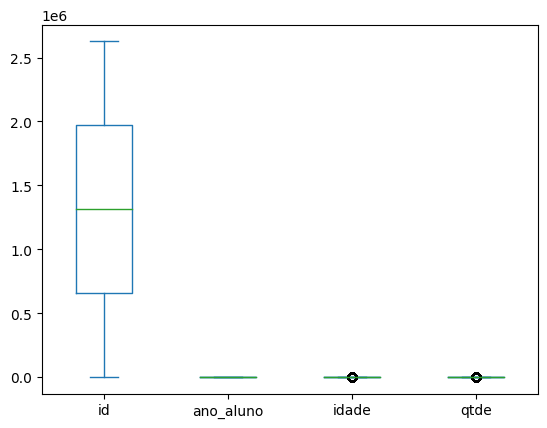

In [48]:
escolas_alunos_df.plot.box()
#Tentativa de identificar e remover os outliers de idade (não consegui realizar até a data de entrega do desafio)

In [49]:
idades_altas = escolas_alunos_df[escolas_alunos_df['idade'] > 100]
print(idades_altas)

              id  codesc                                        nome_escola  \
158696    158697  700045                 HELIOPOLIS - ARLETE PERSOLI, PROFA   
704138    704139  700021  MENINOS - ARTUR ALBERTO DE MOTA GONCALVES, PRO...   
720395    720396  700045                 HELIOPOLIS - ARLETE PERSOLI, PROFA   
771906    771907  501377  ASS - CEDESC CENTRO DE DES ED SOC E CUL DO PQ ...   
924631    924632   94153                                     ARTHUR AZEVEDO   
951974    951975   94587       PROF. GABRIEL SYLVESTRE TEIXEIRA DE CARVALHO   
1082252  1082253  501377  ASS - CEDESC CENTRO DE DES ED SOC E CUL DO PQ ...   
1155823  1155824   13528                          ANNA LAMBERGA ZEGLIO, VER   
1194184  1194185   91898                      ALCEU MAYNARD DE ARAUJO, PROF   
1243345  1243346  307050                               SAO JOSE OPERARIO II   
1325276  1325277  400807                                     VENTURA BRANCO   
1329275  1329276   18520                            

In [50]:
escolas_alunos_df.groupby('sexo')['qtde'].sum()

sexo
F    4197631
M    4382437
Name: qtde, dtype: int64

In [51]:
escolas_alunos_df.groupby('sexo')['idade'].mean()

sexo
F    13.614073
M    10.431506
Name: idade, dtype: float64

In [52]:
escolas_alunos_df.groupby('raca')['qtde'].sum()

raca
AMARELA               30566
BRANCA              3068921
INDIGENA              16947
NAO INFORMADA        739741
NÃO DECLARADA       1327670
PARDA               2574401
PRETA                326983
RECUSOU INFORMA      305145
RECUSOU INFORMAR     189694
Name: qtde, dtype: int64

In [53]:
escolas_alunos_df.groupby('nee')['qtde'].sum()

nee
ALTAS HABILIDADES/SUPERDOTACAO            2321
AUTISMO                                  37110
BAIXA VISAO OU VISAO SUBNORMAL            2185
BAIXA VISAO/VISAO SUBNORMAL               3750
CEGUEIRA                                   623
CODIGO NEE DESATIVADO                       11
DEF FISICA CADEIRANTE                     6634
DEF FISICA NÃO CADEIRANTE                14434
DEFIC. FISICA NAO CADEIRANTE              7177
DEFICIENCIA FÃSICA CADEIRANTE             641
DEFICIENCIA FÍSICA CADEIRANTE             1143
DEFICIENCIA INTELECTUAL                  76680
DEFICIENCIA MULTIPLA                     15129
DEFICIENCIA MULTIPLA CADEIRANTE           5794
DEFICIENCIA MULTIPLA NAO CADEIRANTE      10357
DEFICIENCIA VISUAL                           5
NAO POSSUI                             8382363
SINDROME DE ASPERGER                      1027
SINDROME DE RETT                           246
SURDEZ LEVE/MODERADA                      4012
SURDEZ SEVERA/PROFUNDA                    7427
SURDOCEGU

In [92]:
escolas_alunos_df.groupby(['descturno'])['qtde'].sum()

descturno
Integral         2694714
Intermediario      52215
Manha            2694582
Noite             339433
Tarde            2770018
Vespertino         29106
Name: qtde, dtype: int64

In [91]:
import unicodedata

def remover_acentos_e_normalizar(texto):
    # Normaliza a string para a forma NFD e remove caracteres de acentuação
    texto_sem_acento = ''.join(c for c in unicodedata.normalize('NFD', texto)
                               if unicodedata.category(c) != 'Mn')
    # Retorna o texto em caixa baixa para uniformidade
    return texto_sem_acento.lower().capitalize()

# Aplica a função de remoção de acentos e normalização na coluna 'descturno'
escolas_alunos_df['descturno'] = escolas_alunos_df['descturno'].apply(remover_acentos_e_normalizar)

# Agora, agrupando e somando novamente
resultado_corrigido = escolas_alunos_df.groupby('descturno')['qtde'].sum()

print(resultado_corrigido)

descturno
Integral         2694714
Intermediario      52215
Manha            2694582
Noite             339433
Tarde            2770018
Vespertino         29106
Name: qtde, dtype: int64


In [57]:
escolas_alunos_df

,id,codesc,nome_escola,ano_escola,situacao,diretoria,distrito,dscserie,descturno,ano_aluno,sexo,idade,nee,raca,qtde
0,1,400003,"ALOYSIO DE MENEZES GREENHALGH, VER.",30/09/2016,Ativa,BUTANTA,RIO PEQUENO,BERCARIO II-10h,Integral,2016,F,1.0,NAO POSSUI,BRANCA,4
1,2,400003,"ALOYSIO DE MENEZES GREENHALGH, VER.",30/09/2016,Ativa,BUTANTA,RIO PEQUENO,BERCARIO II-10h,Integral,2016,F,1.0,NAO POSSUI,PRETA,1
2,3,400003,"ALOYSIO DE MENEZES GREENHALGH, VER.",30/09/2016,Ativa,BUTANTA,RIO PEQUENO,BERCARIO II-10h,Integral,2016,F,2.0,NAO POSSUI,BRANCA,2
3,4,400003,"ALOYSIO DE MENEZES GREENHALGH, VER.",30/09/2016,Ativa,BUTANTA,RIO PEQUENO,BERCARIO II-10h,Integral,2016,F,2.0,NAO POSSUI,NÃO DECLARADA,1
4,5,400003,"ALOYSIO DE MENEZES GREENHALGH, VER.",30/09/2016,Ativa,BUTANTA,RIO PEQUENO,BERCARIO II-10h,Integral,2016,F,2.0,NAO POSSUI,PARDA,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2626477,2626478,309772,ZION,31/12/2022,Ativa,SAO MATEUS,SAO MATEUS,MINI GRUPO I,Integral,2022,M,2.0,NAO POSSUI,RECUSOU INFORMA,1
2626478,2626479,309772,ZION,31/12/2022,Ativa,SAO MATEUS,SAO MATEUS,MINI GRUPO I,Integral,2022,M,3.0,NAO POSSUI,AMARELA,1
2626479,2626480,309772,ZION,31/12/2022,Ativa,SAO MATEUS,SAO MATEUS,MINI GRUPO I,Integral,2022,M,3.0,NAO POSSUI,BRANCA,1
2626480,2626481,309772,ZION,31/12/2022,Ativa,SAO MATEUS,SAO MATEUS,MINI GRUPO I,Integral,2022,M,3.0,NAO POSSUI,PARDA,2


#Utilizando plotly

In [93]:
import plotly.express as px
quantidade_por_ano_turno = escolas_alunos_df.groupby(['ano_aluno', 'descturno'])['qtde'].sum().reset_index()

pivot_table = quantidade_por_ano_turno.pivot(index='ano_aluno', columns='descturno', values='qtde')

print(pivot_table)

descturno  Integral  Intermediario   Manha  Noite   Tarde  Vespertino
ano_aluno                                                            
2016         303162          10024  427636  66289  456598        5222
2017         306139           9466  397224  51413  426603        4344
2018         373156           3204  379717  47804  360984        3999
2019         500477          17677  553921  74435  567723        6739
2020         377197           2509  318006  41475  317010        3430
2021         428870           1706  313569  31110  310741        1856
2022         405713           7629  304509  26907  330359        3516


In [94]:
fig = px.bar(pivot_table, barmode='group',
             labels={'value': 'Quantidade de Alunos', 'variable': 'Turno', 'ano_aluno': 'Ano do Aluno'},
             title='Quantidade de Alunos por Ano e Turno')

fig.update_xaxes(title_text='Ano do Aluno')
fig.update_yaxes(title_text='Quantidade de Alunos')
fig.update_layout(legend_title_text='Turno')

fig.show()

In [80]:
quantidade_por_ano = escolas_alunos_df.groupby('ano_aluno')['qtde'].sum().reset_index()

print(quantidade_por_ano)

   ano_aluno     qtde
0       2016  1268931
1       2017  1195189
2       2018  1168864
3       2019  1720972
4       2020  1059627
5       2021  1087852
6       2022  1078633


In [81]:
fig = px.bar(quantidade_por_ano, x='ano_aluno', y='qtde',
             labels={'qtde': 'Quantidade Total de Alunos', 'ano_aluno': 'Ano'},
             title='Quantidade Total de Alunos por Ano')

fig.show()

In [82]:
media_idade_por_ano = escolas_alunos_df.groupby('ano_aluno')['idade'].mean().reset_index()

print(media_idade_por_ano)

   ano_aluno      idade
0       2016  15.073704
1       2017  14.682792
2       2018  11.917613
3       2019  12.812307
4       2020  11.876478
5       2021  10.873103
6       2022   8.466054


In [85]:
fig = px.bar(media_idade_por_ano, x='ano_aluno', y='idade',
             labels={'idade': 'Quantidade Total de Alunos', 'ano_aluno': 'Ano'},
             title='Média de idade de alunos por ano')

fig.show()

In [61]:
quantidade_por_ano_sexo = escolas_alunos_df.groupby(['ano_aluno', 'raca'])['qtde'].sum().reset_index()

pivot_table3 = quantidade_por_ano_sexo.pivot(index='ano_aluno', columns='sexo', values='qtde')

print(pivot_table3)

raca       AMARELA    BRANCA  INDIGENA  NAO INFORMADA  NÃO DECLARADA  \
ano_aluno                                                              
2016        3185.0  398166.0    2147.0            NaN       524539.0   
2017        2603.0  347152.0    1929.0            NaN       541974.0   
2018        3472.0  363379.0    1856.0       428159.0            NaN   
2019        6421.0  651282.0    3511.0       311582.0            NaN   
2020        4480.0  429047.0    2223.0            NaN        60976.0   
2021        5163.0  445633.0    2668.0            NaN       183034.0   
2022        5242.0  434262.0    2613.0            NaN        17147.0   

raca          PARDA    PRETA  RECUSOU INFORMA  RECUSOU INFORMAR  
ano_aluno                                                        
2016       301778.0  39116.0              NaN               NaN  
2017       267284.0  34247.0              NaN               NaN  
2018       287377.0  36258.0              NaN           48363.0  
2019       537363.0  

In [71]:
fig = px.bar(pivot_table3, barmode='group',
             labels={'value': 'Quantidade de Alunos', 'variable': 'Raca', 'ano_aluno': 'Ano do Aluno'},
             title='Quantidade de Alunos por Ano e Raça')

fig.update_xaxes(title_text='Ano do Aluno')
fig.update_yaxes(title_text='Quantidade de Alunos')
fig.update_layout(legend_title_text='Raca')

fig.show()

In [64]:
quantidade_por_ano_sexo = escolas_alunos_df.groupby(['ano_aluno', 'distrito'])['qtde'].sum().reset_index()

pivot_table4 = quantidade_por_ano_sexo.pivot(index='ano_aluno', columns='distrito', values='qtde')

print(pivot_table4)

distrito   AGUA RASA  ALTO DE PINHEIROS  ANHANGUERA  ARICANDUVA  ARTUR ALVIM  \
ano_aluno                                                                      
2016            4615                398       14641        6925        11414   
2017            3266                404       13639        6419        11262   
2018            4639                396       12645        5793        10998   
2019            6821                535       17486        8430        16569   
2020            3970                425       11238        5358         9840   
2021            4084                397       10747        5053         9931   
2022            3958                339       10860        5078         9618   

distrito   BARRA FUNDA  BELA VISTA  BELEM  BOM RETIRO  BRAS  ...  \
ano_aluno                                                    ...   
2016               371        3267   2759        1665  1100  ...   
2017               337        3321   2910        1711  1055  ...   
2018   

In [70]:
#Esse foi uma tentativa de trazer um gráfico da quantidade de alunos por ano, por cada distrito. Porém a visualização ficou ruim devido a quantidade de dados. Ainda não consegui estudar como conseguiria fazer este gráfico com dados assim.
fig = px.bar(pivot_table4, barmode='group',
             labels={'value': 'Quantidade de Alunos', 'variable': 'Distrito', 'ano_aluno': 'Ano do Aluno'},
             title='Quantidade de Alunos por Ano e Distrito')

fig.update_xaxes(title_text='Ano do Aluno')
fig.update_yaxes(title_text='Quantidade de Alunos')
fig.update_layout(legend_title_text='Distrito')

fig.show()

In [ ]:
quantidade_por_ano_sexo = escolas_alunos_df.groupby(['ano_aluno', 'sexo'])['qtde'].sum().reset_index()

pivot_table = quantidade_por_ano_sexo.pivot(index='ano_aluno', columns='sexo', values='qtde')

print(pivot_table)


In [66]:
fig = px.bar(pivot_table, barmode='group',
             labels={'value': 'Quantidade de Alunos', 'variable': 'Sexo', 'ano_aluno': 'Ano do Aluno'},
             title='Quantidade de Alunos por Ano e Sexo')

fig.update_xaxes(title_text='Ano do Aluno')
fig.update_yaxes(title_text='Quantidade de Alunos')
fig.update_layout(legend_title_text='Sexo')

fig.show()

In [66]:
conn.close()